## Assignment-2
### Name: Harshitha Anishetty
### StudenID: 8903318

Download heart disease dataset heart.csv in Resources folder and do following,  https://www.kaggle.com/fedesoriano/heart-failure-prediction

1.Consider the heart disease dataset in pandas dataframe

2.Remove outliers using mean,median,Z score. 

3.Convert text columns to numbers using label encoding and one hot encoding

4.Apply scaling

5.Build a machine learning classification model using support vector machine. Demonstrate the standalone model as well as Bagging model and include observations about the oerformance

6.Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance

7.Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why. 

#### Import Necessary Libraries

In [160]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#### Load the Dataset

In [161]:
# Load the dataset
data = pd.read_csv('../../practical_labs/heart.csv')
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


#### Scaling the data

In [162]:
# Drop non-numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
data_numeric = data[numeric_columns]
data_numeric

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


#### Remove Outliers

In [163]:
# Removing the outliers with Z-score of more than 3 standard deviations away from mean = 0
z_scores = zscore(data_numeric)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_without_outliers = data_numeric[filtered_entries]
data_without_outliers

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


#### Convert Text Columns to Numbers

In [164]:
# Convert categorical columns to numerical using label encoding
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina'])


# Convert categorical columns to one-hot encoding
data = pd.get_dummies(
    data, columns=[ 'ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

data


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,False,False,True,True,False,True,False
914,68,1,144,193,1,141,0,3.4,1,False,False,False,True,False,True,False
915,57,1,130,131,0,115,1,1.2,1,False,False,False,True,False,True,False
916,57,0,130,236,0,174,0,0.0,1,True,False,False,False,False,True,False


#### Apply Scaling

In [165]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_without_outliers)
scaled_data

array([[0.24489796, 0.57142857, 0.55791506, ..., 0.78417266, 0.33333333,
        0.        ],
       [0.42857143, 0.76190476, 0.34749035, ..., 0.66906475, 0.5       ,
        1.        ],
       [0.18367347, 0.47619048, 0.54633205, ..., 0.25179856, 0.33333333,
        0.        ],
       ...,
       [0.59183673, 0.47619048, 0.25289575, ..., 0.37410072, 0.53333333,
        1.        ],
       [0.59183673, 0.47619048, 0.45559846, ..., 0.79856115, 0.33333333,
        1.        ],
       [0.20408163, 0.55238095, 0.33783784, ..., 0.79136691, 0.33333333,
        0.        ]])

#### Building SVM Classification Model

In [166]:
# Splitting data into features (X) and target (y)
X = scaled_data[:, :-1]
y = scaled_data[:, -1]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Creating SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predicting on the test set
svm_predictions = svm_model.predict(X_test)

# Calculating accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.7277777777777777


#### Building Decision Tree Classification Model

In [167]:

# Creating Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting on the test set
dt_predictions = dt_model.predict(X_test)

# Calculating accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.6944444444444444


#### Comparing SVM and Decision Tree Performance

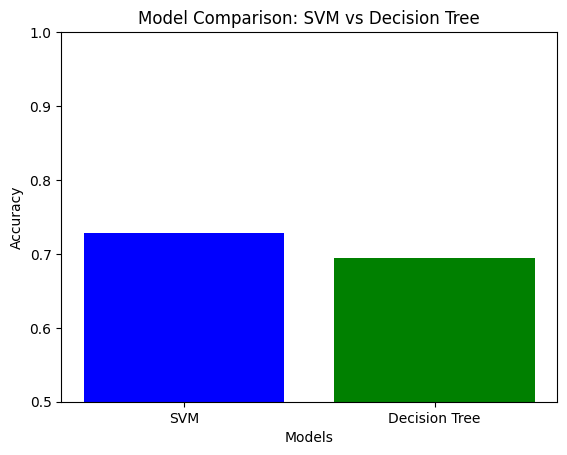

In [168]:
# Create a bar graph to compare SVM and Decision Tree accuracies
models = ['SVM', 'Decision Tree']
accuracies = [svm_accuracy, dt_accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: SVM vs Decision Tree')
plt.ylim(0.5, 1.0)
plt.show()

#### Using Bagging

In [169]:
# Creating Bagging models
svm_bagging_model = BaggingClassifier(
    base_estimator=svm_model, n_estimators=10, random_state=42)
svm_bagging_model.fit(X_train, y_train)

dt_bagging_model = BaggingClassifier(
    base_estimator=dt_model, n_estimators=10, random_state=42)
dt_bagging_model.fit(X_train, y_train)

# Predicting on the test set for both bagging models
svm_bagging_predictions = svm_bagging_model.predict(X_test)
dt_bagging_predictions = dt_bagging_model.predict(X_test)

# Calculating accuracies for both bagging models
svm_bagging_accuracy = accuracy_score(y_test, svm_bagging_predictions)
dt_bagging_accuracy = accuracy_score(y_test, dt_bagging_predictions)

print("SVM Bagging Accuracy:", svm_bagging_accuracy)
print("Decision Tree Bagging Accuracy:", dt_bagging_accuracy)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


SVM Bagging Accuracy: 0.7333333333333333
Decision Tree Bagging Accuracy: 0.7555555555555555


#### Comparing Models with Bagging

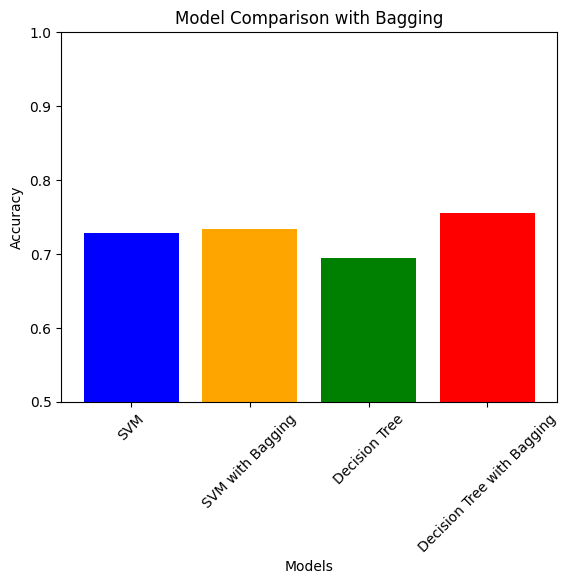

In [170]:
models = ['SVM', 'SVM with Bagging',
          'Decision Tree', 'Decision Tree with Bagging']
accuracies = [svm_accuracy, svm_bagging_accuracy,
              dt_accuracy, dt_bagging_accuracy]

plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison with Bagging')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.show()

#### Conclusion

SVM and Decision Tree are both effective classifiers.

Bagging tends to improve model performance by reducing variance.

Bagging is especially useful when dealing with high-variance models like Decision Trees.

In conclusion, bagging can be more effective when applied to models with high variance and low bias, like decision trees. On the other hand, SVMs already have a regularization mechanism that helps control overfitting, so the improvement might be less significant compared to decision trees.